In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
cwd = os.getcwd()
cancel = pd.read_csv(cwd + '/cancel.csv')

In [4]:
# get yearly flight info
infile = open('yearly_flights.pickle', 'rb')
yearly = pickle.load(infile)
infile.close()

In [5]:
yearly

{'Total Flights': 6951793,
 'Months': {'January Flights': 570118,
  'February Flights': 520731,
  'March Flights': 611987,
  'April Flights': 596046,
  'May Flights': 616529,
  'June Flights': 626193,
  'July Flights': 645299,
  'August Flights': 644673,
  'September Flights': 585749,
  'October Flights': 616101,
  'November Flights': 454162,
  'December Flights': 464205},
 'Seasons': {'Spring Flights': 1866428,
  'Summer Flights': 1910847,
  'Fall Flights': 1545252,
  'Winter Flights': 1629266},
 'Airlines': {'Endeavor Air': 205728,
  'American Airlines': 909554,
  'Alaska Airlines': 234333,
  'JetBlue': 303722,
  'Delta Airlines': 945194,
  'ExpressJet': 216089,
  'Frontier Airlines': 118871,
  'Allegiant Air': 80908,
  'Hawaiian Airlines': 82904,
  'Envoy Air': 245812,
  'Spirit Airlines': 172771,
  'PSA Airlines': 232630,
  'SkyWest Airlines': 767028,
  'United Airlines': 615683,
  'Virgin American': 30111,
  'SouthWest Airlines': 1347369,
  'Mesa Airlines': 178097,
  'Republic Air

## Monthly 

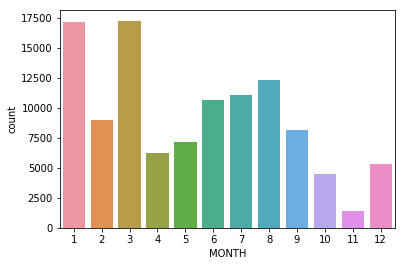

In [23]:
sns.countplot(cancel['MONTH'])

In [7]:
# charting how many cancelations for each month
month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

month_ct = cancel['MONTH'].value_counts()
freq = [month_ct[x] for x in range(1,13)]

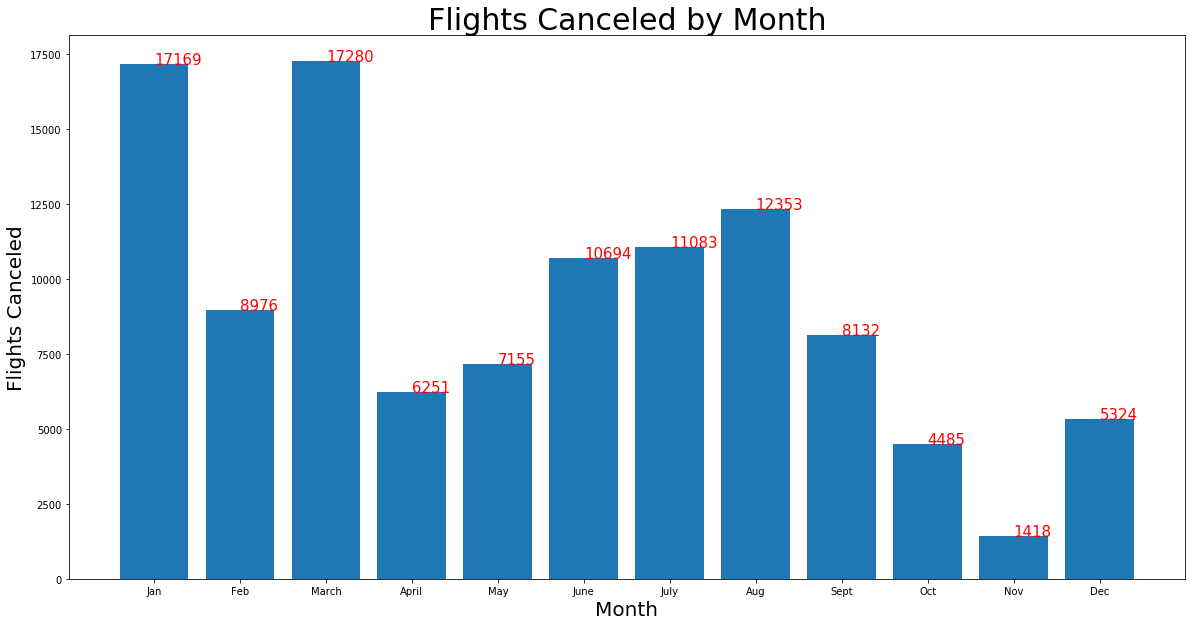

In [8]:
plt.figure(figsize=(20,10))
plt.bar(month, freq)
plt.title("Flights Canceled by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(month, freq):
    plt.text(a, b, str(b), fontsize =15, color ='r')
plt.show()

### % of flights cancled per month

In [9]:
m = yearly['Months']
f = list(m.values())
m_pct = []

#get a list of what % of flights were canceled per month
for x in range(len(f)):
    m_pct.append(round((freq[x]/f[x]) * 100,2))

# for x in range(len(f)):
#     print(str(round((freq[x]/f[x]) * 100,2)) + "%" )

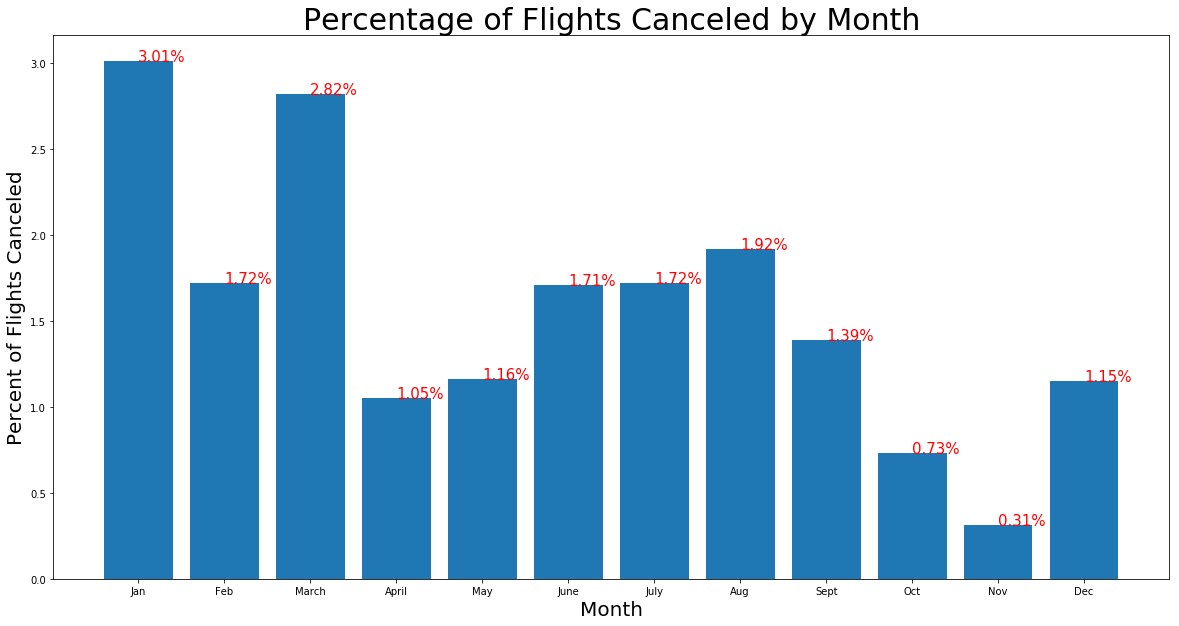

In [10]:
plt.figure(figsize=(20,10))
plt.bar(month, m_pct)
plt.title("Percentage of Flights Canceled by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Percent of Flights Canceled', fontsize =20)
for a,b in zip(month, m_pct):
    plt.text(a, b, str(b) + '%', fontsize =15, color ='r')
plt.show()

In [11]:
m_pct

[3.01, 1.72, 2.82, 1.05, 1.16, 1.71, 1.72, 1.92, 1.39, 0.73, 0.31, 1.15]

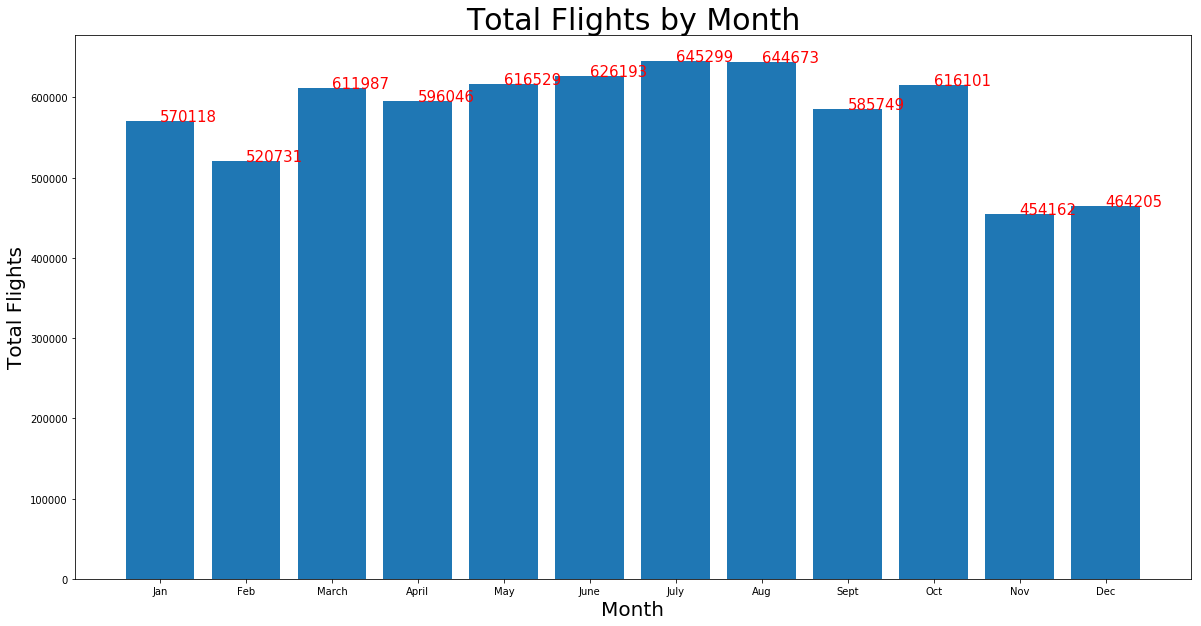

In [12]:
plt.figure(figsize=(20,10))
plt.bar(month, f)
plt.title("Total Flights by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Total Flights', fontsize =20)
for a,b in zip(month, f):
    plt.text(a, b, str(b), fontsize =15, color ='r')
plt.show()

In [13]:
yearly['Months']['January Flights']

570118

## Seasonal 

In [14]:
cancel['FL_DATE'] = pd.to_datetime(cancel['FL_DATE'])
winter_start = '12-21-2017'
winter_end = '03-19-2018'
maskw = (cancel['FL_DATE'] >= winter_start) & (cancel['FL_DATE'] <= winter_end)
winter = cancel.loc[maskw]

spring_start = '03-20-2018'
spring_end = '06-20-2018'
masksp = (cancel['FL_DATE'] >= spring_start) & (cancel['FL_DATE'] <= spring_end)
spring = cancel.loc[masksp]

summer_start = '06-21-2018'
summer_end = '09-21-2018'
masksum = (cancel['FL_DATE'] >= summer_start) & (cancel['FL_DATE'] <= summer_end)
summer = cancel.loc[masksum]

fall_start = '11-01-2017'
fall_end = '12-20-2017'
aut_start = '09-22-2018'
aut_end = '10-31-2018'
maskf = (cancel['FL_DATE'] >= fall_start) & (cancel['FL_DATE'] <= fall_end)
maska = (cancel['FL_DATE'] >= aut_start) & (cancel['FL_DATE'] <= aut_end)
fall = cancel.loc[maskf]
aut = cancel.loc[maska]
fall = fall.append([aut])

In [15]:
season = ['Fall', "Winter", "Spring", "Summer"]
amt = [len(fall), len(winter), len(spring), len(summer)]

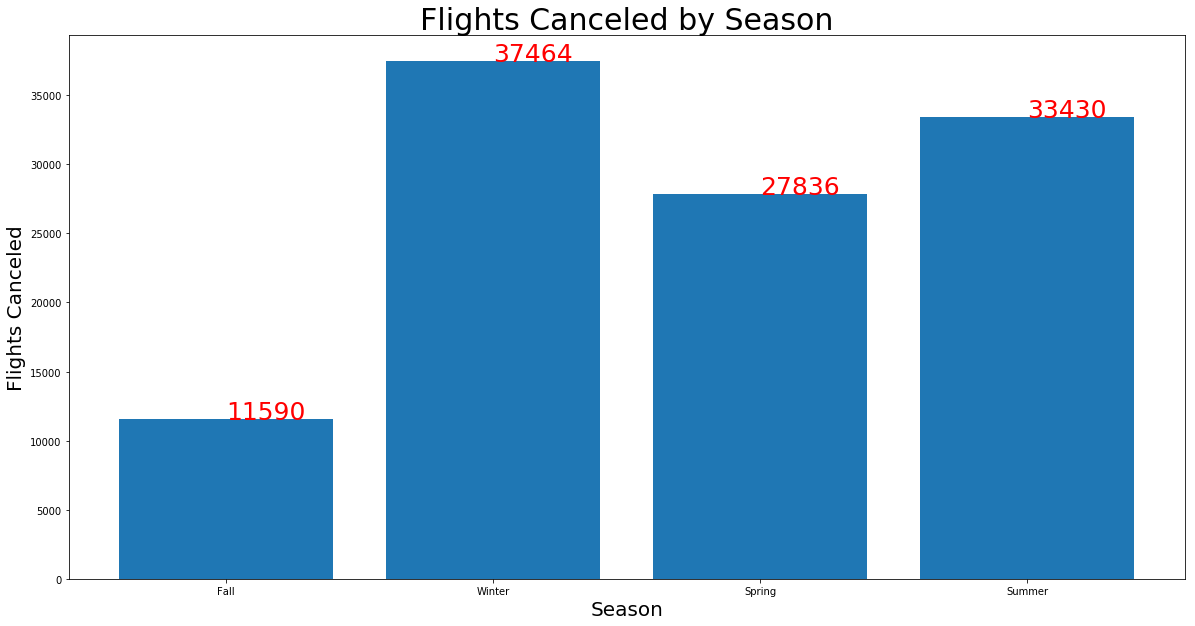

In [16]:
plt.figure(figsize=(20,10))
plt.bar(season, amt)
plt.title("Flights Canceled by Season", fontsize =30)
plt.xlabel('Season', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(season, amt):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

### % of flights cancled per season

In [17]:
s = yearly['Seasons']
sea = list(s.values())
s_pct = []

#get a list of what % of flights were canceled per month
for x in range(len(s)):
    s_pct.append(round((amt[x]/sea[x]) * 100,2))

In [18]:
s_pct

[0.62, 1.96, 1.8, 2.05]

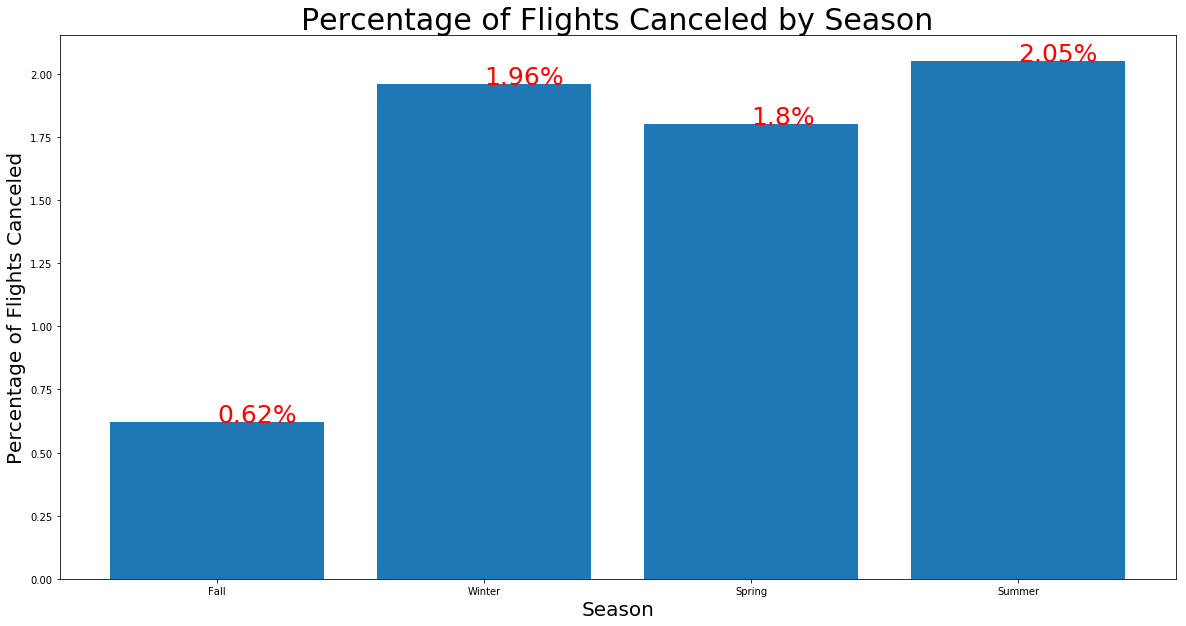

In [19]:
plt.figure(figsize=(20,10))
plt.bar(season, s_pct)
plt.title("Percentage of Flights Canceled by Season", fontsize =30)
plt.xlabel('Season', fontsize =20)
plt.ylabel('Percentage of Flights Canceled', fontsize =20)
for a,b in zip(season, s_pct):
    plt.text(a, b, str(b) + '%', fontsize =25, color ='r')
plt.show()

## Airline

#### <B><U> AIRLINE KEY
“9E”,”ENDEAVOR AIR” <br>
"AS","ALASKA AIRLINES"<br>
"B6","JETBLUE AIRLINES"<br>
"DL","DELTA AIRLINES"<br>
“EV”,“EXPRESSJET AIRLINES”<br> 
"F9","FRONTIER AIRLINES"<br>
"G4","ALLEGIANT AIR"<br>
"HA","HAWAIIAN AIRLINES"<br>
“MQ”,”ENVOY AIR”<br>
"NK","SPIRIT AIRLINES"<br>
“OH”,”PSA AIRLINES"<br>
“OO”,”SKYWEST AIRLINES”<br>
"UA","UNITED AIRLINES"<br>
"VX”,”VIRGIN AMERICA"<br>
"WN","SOUTHWEST AIRLINES"<br>
“YV”,”MESA AIRLINES”<br>
“YX”,”REPUBLIC AIRLINE”<br>

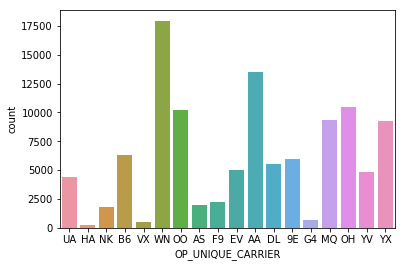

In [20]:
sns.countplot(cancel['OP_UNIQUE_CARRIER'])

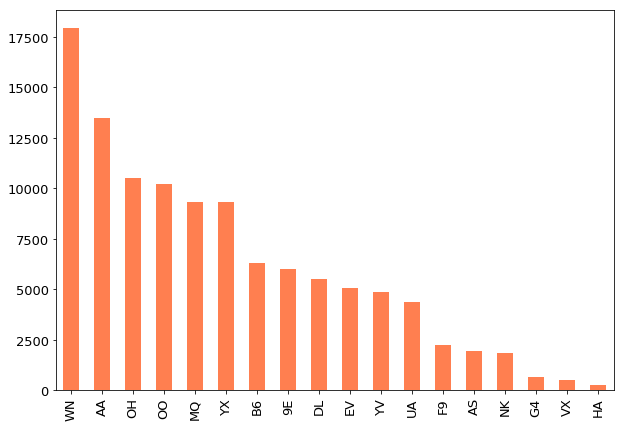

In [21]:
ax = cancel['OP_UNIQUE_CARRIER'].value_counts().plot(kind='bar', 
                    figsize=(10,7),color="coral", fontsize=13)

In [22]:
carrier = sorted(list(set(cancel['OP_UNIQUE_CARRIER'])))
c_ct = cancel['OP_UNIQUE_CARRIER'].value_counts()
carry = [c_ct[x] for x in carrier]

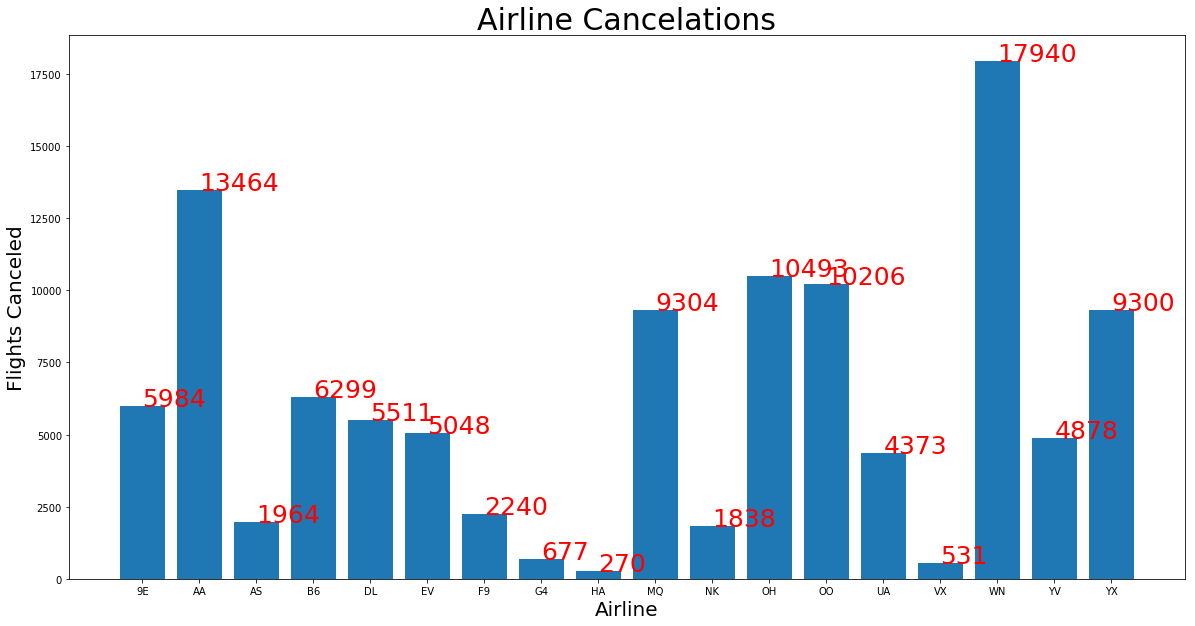

In [23]:
plt.figure(figsize=(20,10))
plt.bar(carrier, carry)
plt.title("Airline Cancelations", fontsize =30)
plt.xlabel('Airline', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(carrier, carry):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

In [24]:
a = yearly['Airlines']
line = list(a.values())
a_pct = []

#get a list of what % of flights were canceled per month
for x in range(len(a)):
    a_pct.append(round((carry[x]/line[x]) * 100,2))

In [25]:
a_pct

[2.91,
 1.48,
 0.84,
 2.07,
 0.58,
 2.34,
 1.88,
 0.84,
 0.33,
 3.79,
 1.06,
 4.51,
 1.33,
 0.71,
 1.76,
 1.33,
 2.74,
 3.51]

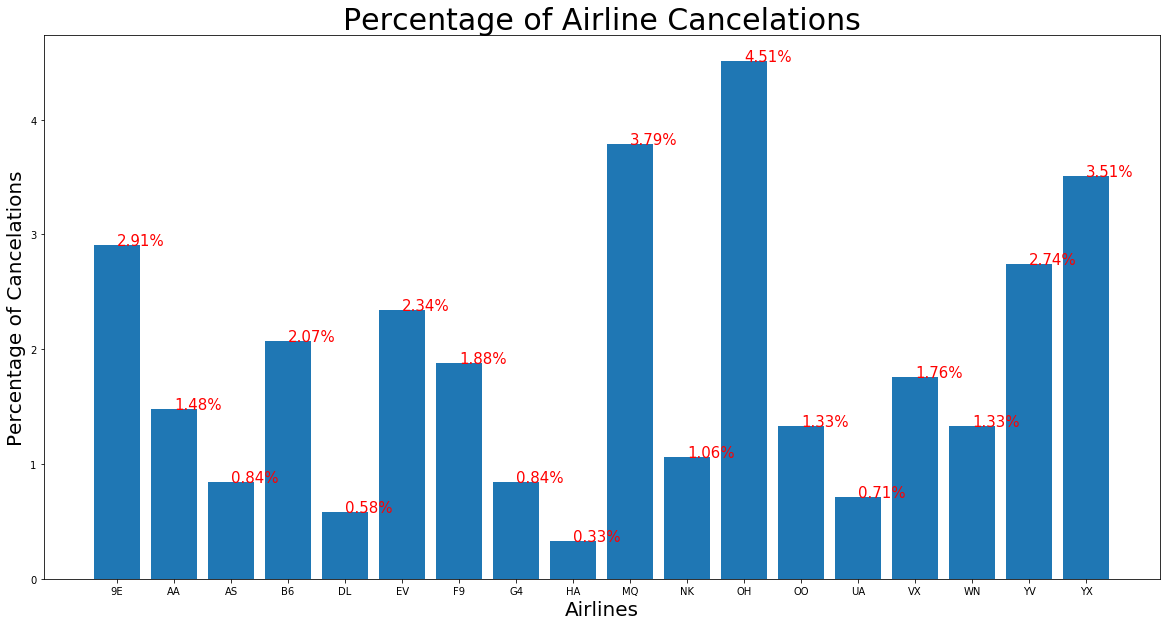

In [26]:
plt.figure(figsize=(20,10))
plt.bar(carrier, a_pct)
plt.title("Percentage of Airline Cancelations", fontsize =30)
plt.xlabel('Airlines', fontsize =20)
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(carrier, a_pct):
    plt.text(a, b, str(b) + '%', fontsize =15, color ='r')
plt.show()

## Airports

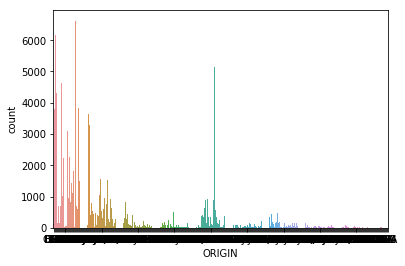

In [29]:
f = sns.countplot(cancel['ORIGIN'])
# f.fig.set_size_inches(15,15)

In [30]:
p = cancel['ORIGIN'].value_counts() 
airport = set(cancel['ORIGIN'])
port = [x for x in airport if p[x] >=1000]
val = [p[x] for x in airport if p[x] >=1000]

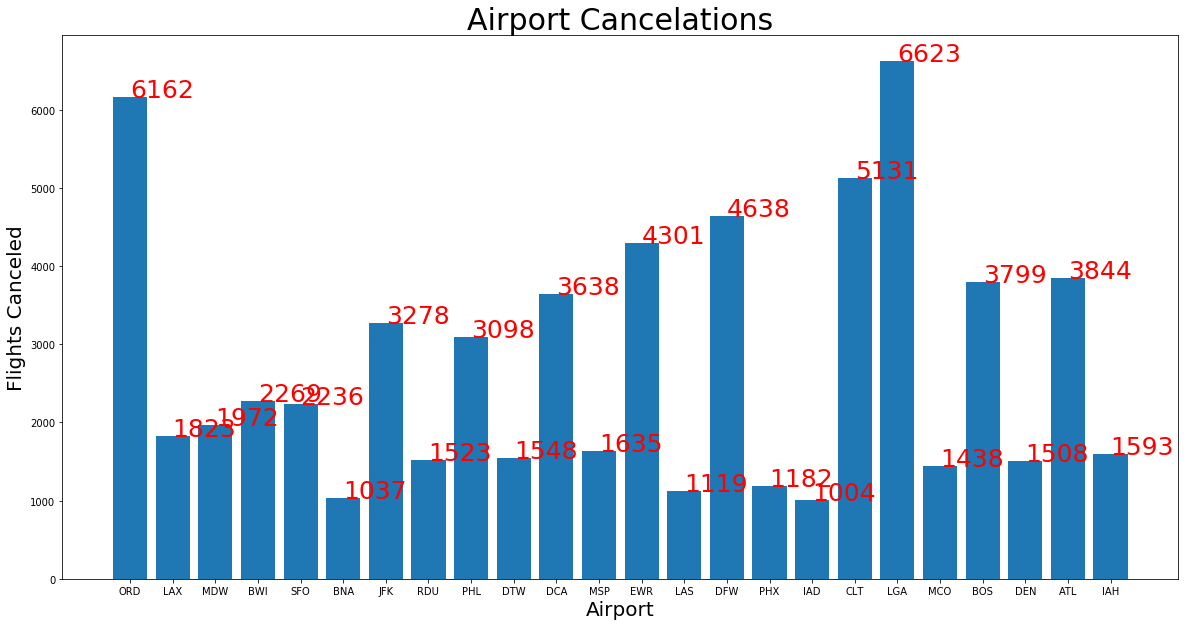

In [31]:
plt.figure(figsize=(20,10))
plt.bar(port, val)
plt.title("Airport Cancelations", fontsize =30)
plt.xlabel('Airport', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(port, val):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

In [32]:
len(airport)

344

In [33]:
len(port)

24

In [35]:
p

LGA    6623
ORD    6162
CLT    5131
DFW    4638
EWR    4301
ATL    3844
BOS    3799
DCA    3638
JFK    3278
PHL    3098
BWI    2269
SFO    2236
MDW    1972
LAX    1823
MSP    1635
IAH    1593
DTW    1548
RDU    1523
DEN    1508
MCO    1438
PHX    1182
LAS    1119
BNA    1037
IAD    1004
DAL     959
FLL     957
STL     930
CLE     921
PIT     909
CVG     902
       ... 
PUB       5
ADK       5
SCK       5
HLN       5
BTM       4
OWB       4
STX       4
RFD       4
BJI       4
EKO       3
CPR       3
SLN       3
FLO       3
LBF       3
DLG       3
BFF       3
BKG       2
HOB       2
LBL       2
GUC       2
GST       2
OGD       1
PIH       1
STC       1
LWS       1
HYA       1
VEL       1
SGU       1
CDC       1
PPG       1
Name: ORIGIN, Length: 344, dtype: int64